# Neurons example, pt. 2: large datasets

In [20]:
import numpyro
from bayes_window import models, fake_spikes_explore, BayesWindow
from bayes_window.generative_models import generate_fake_spikes
import numpy as np
from importlib import reload
import altair as alt
alt.renderers.enable('altair_saver', fmts=['png']);

In [21]:

df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=20,
                                                                n_neurons=6,
                                                                n_mice=3,
                                                                dur=5,
                                                               mouse_response_slope=40,
                                                               overall_stim_response_strength=5)


## NUTS GLM

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

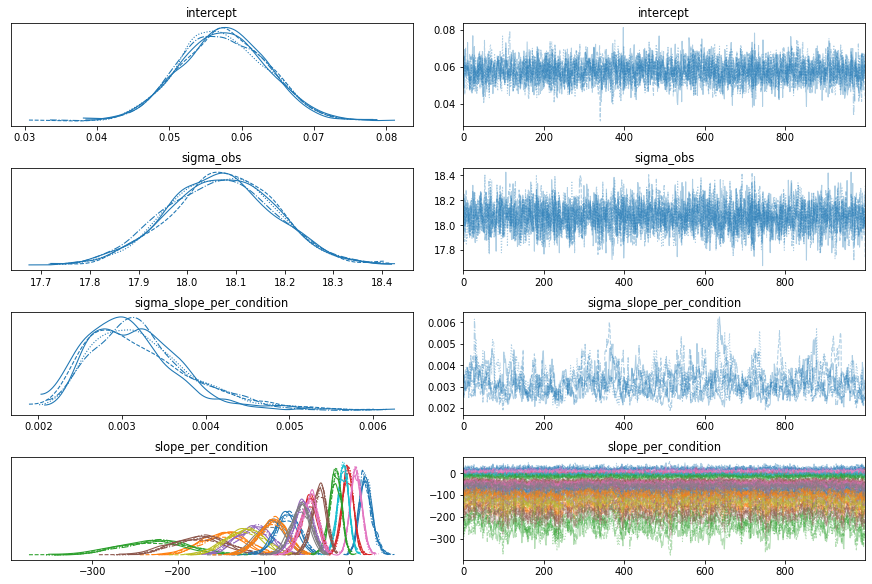

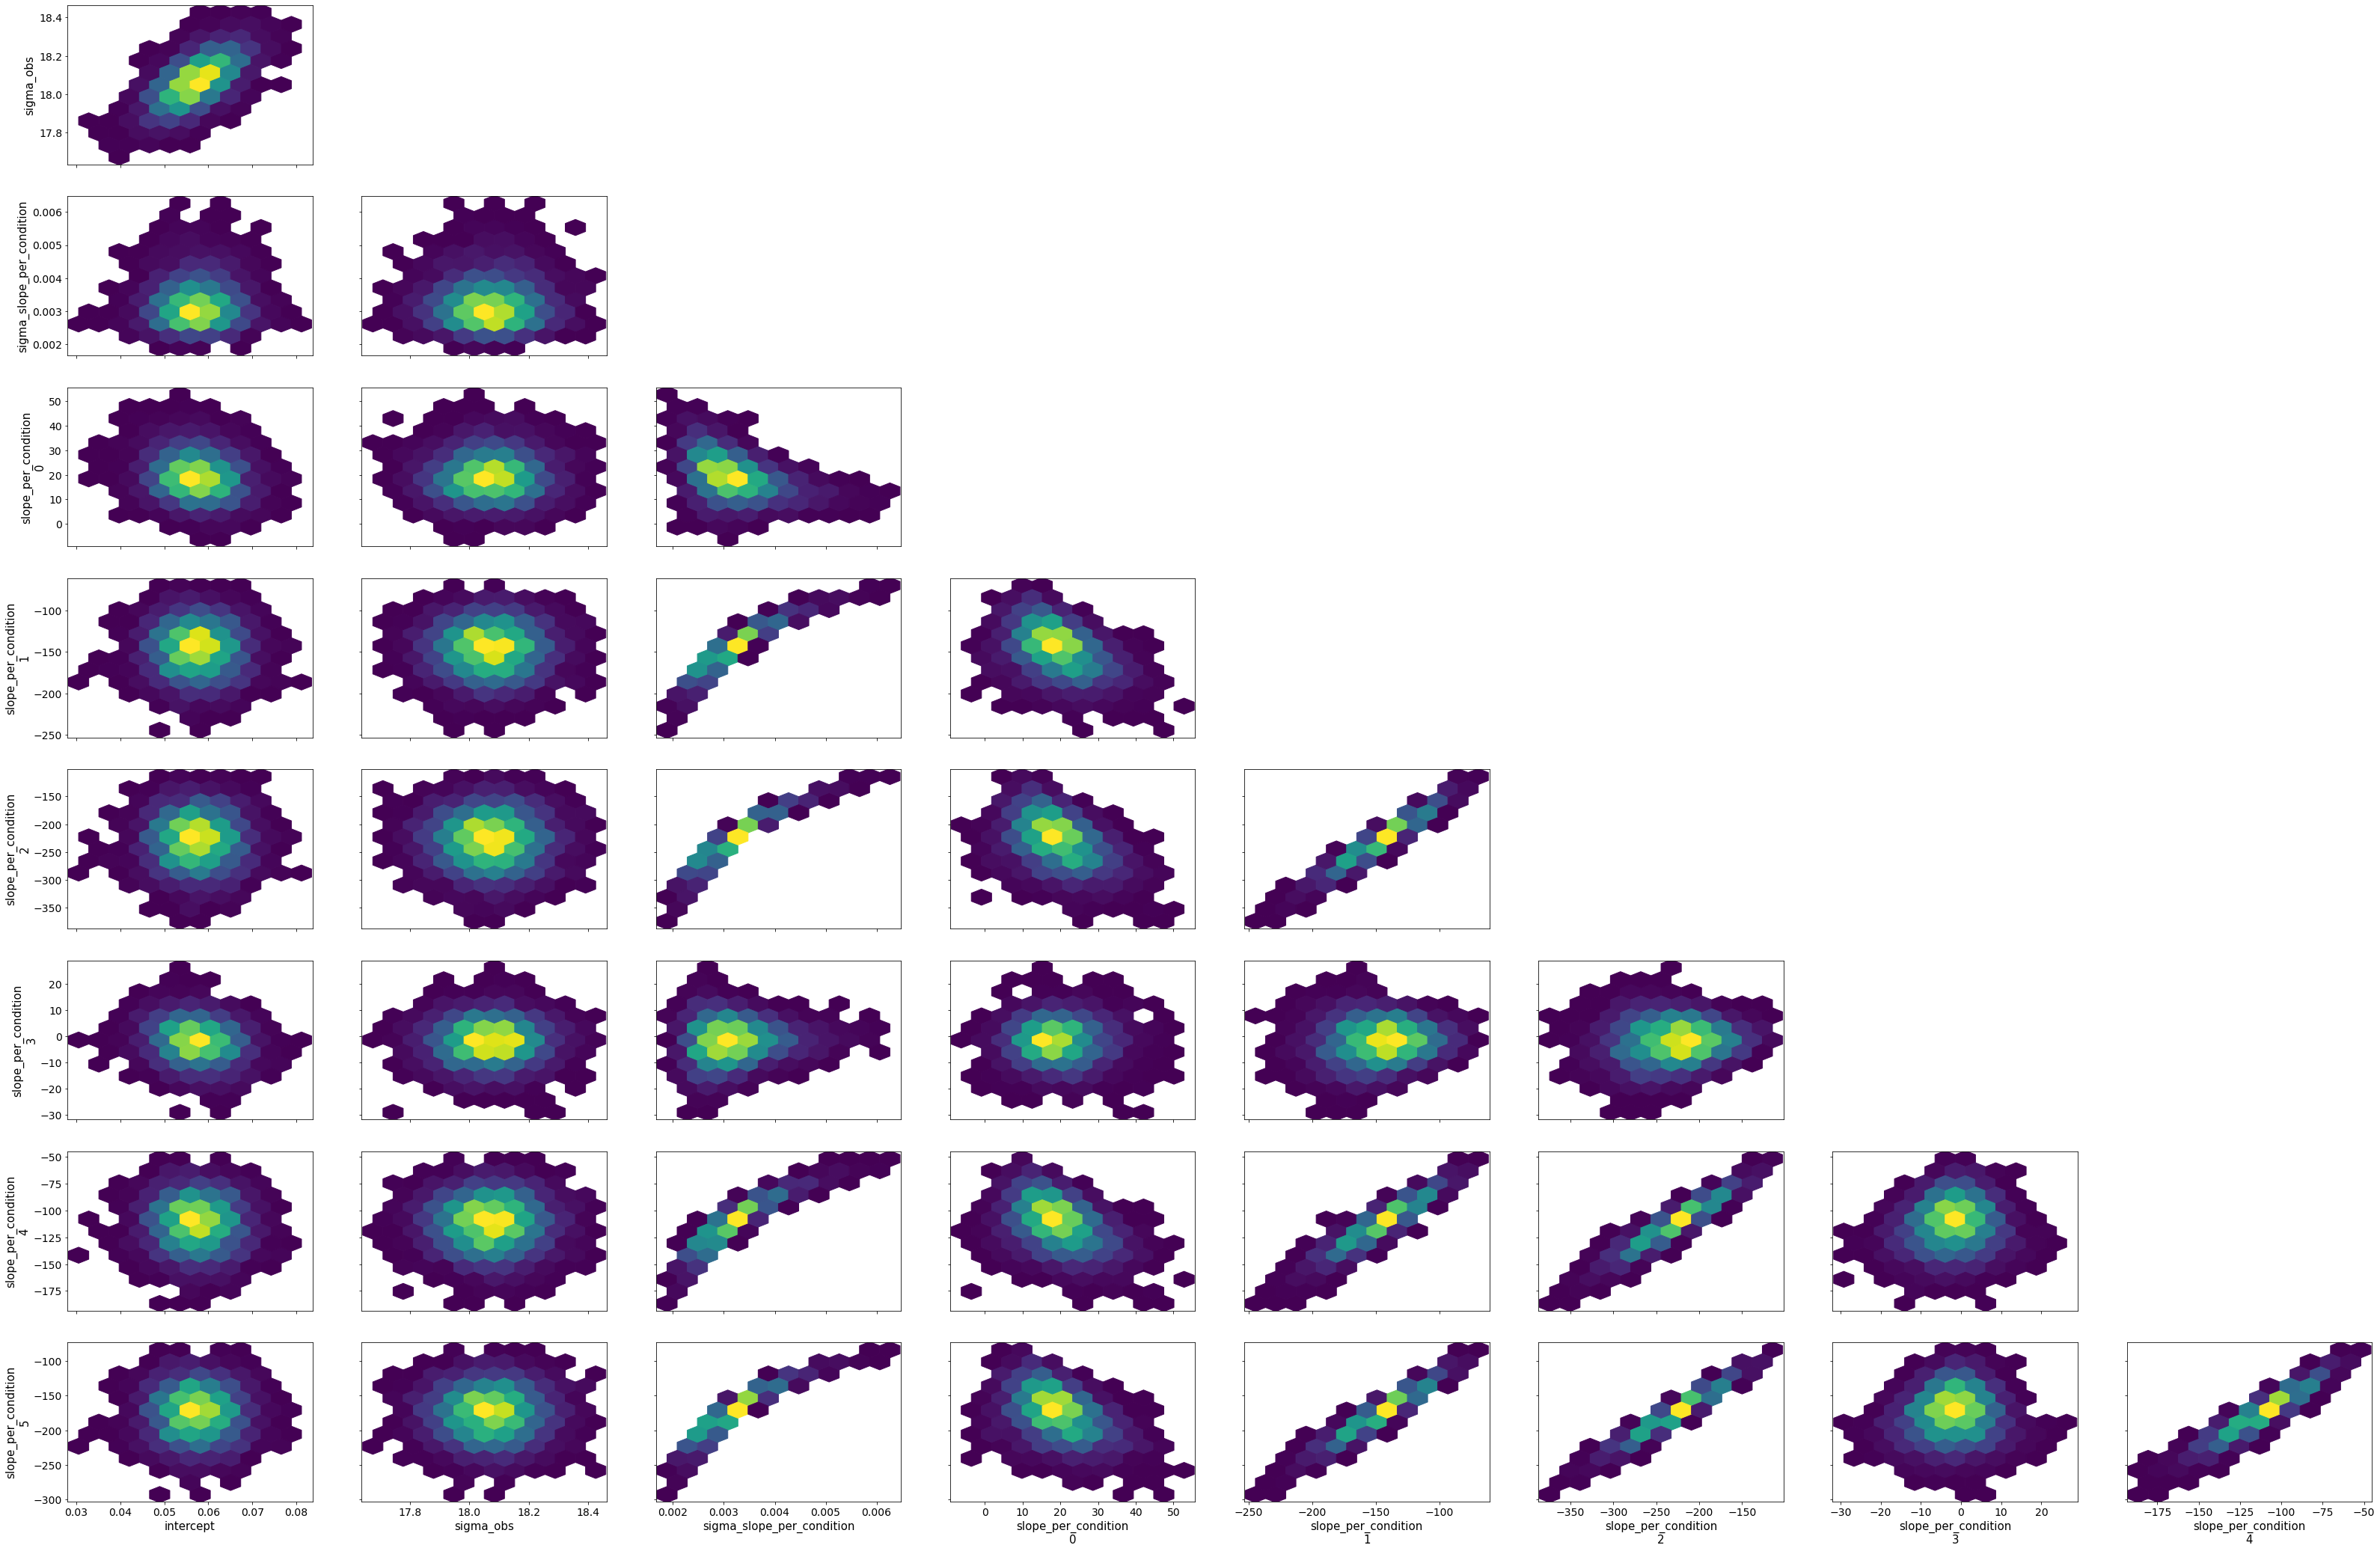

In [22]:
# Gamma GLM
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=(models.model_hierarchical),
              progress_bar=True,
              do_make_change='subtract',
              dist_y='gamma',
              robust_slopes=False,
              add_group_intercept=False,
              add_group_slope=False, 
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse'))

bw.plot_model_quality()

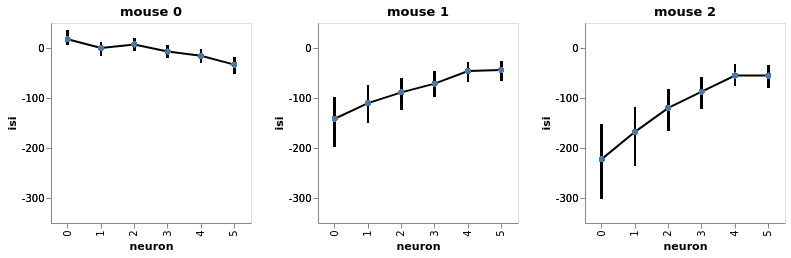

In [23]:
import altair as alt
alt.data_transformers.disable_max_rows()
bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

## NUTS student

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

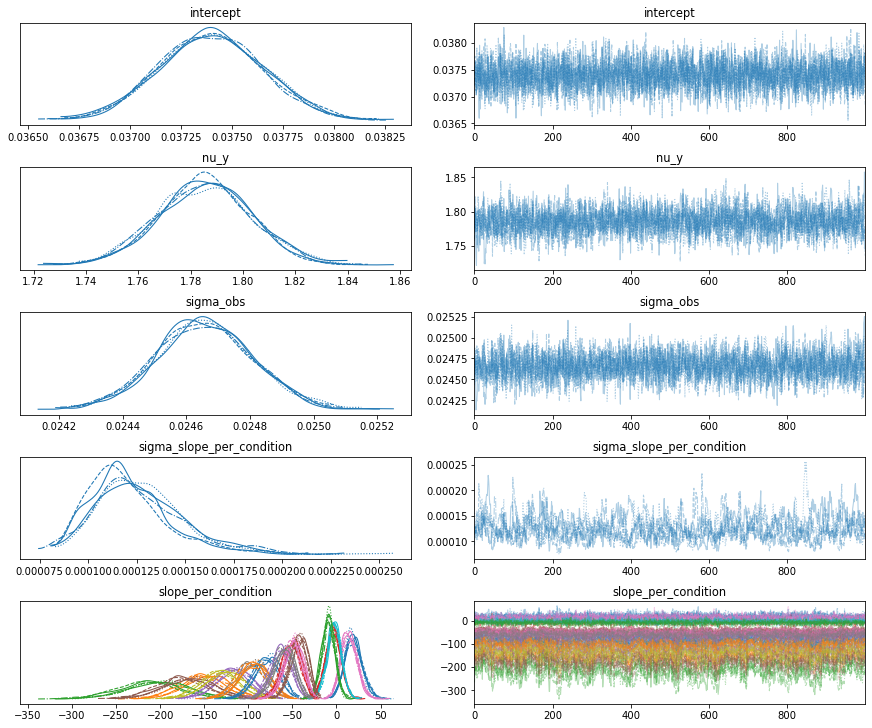

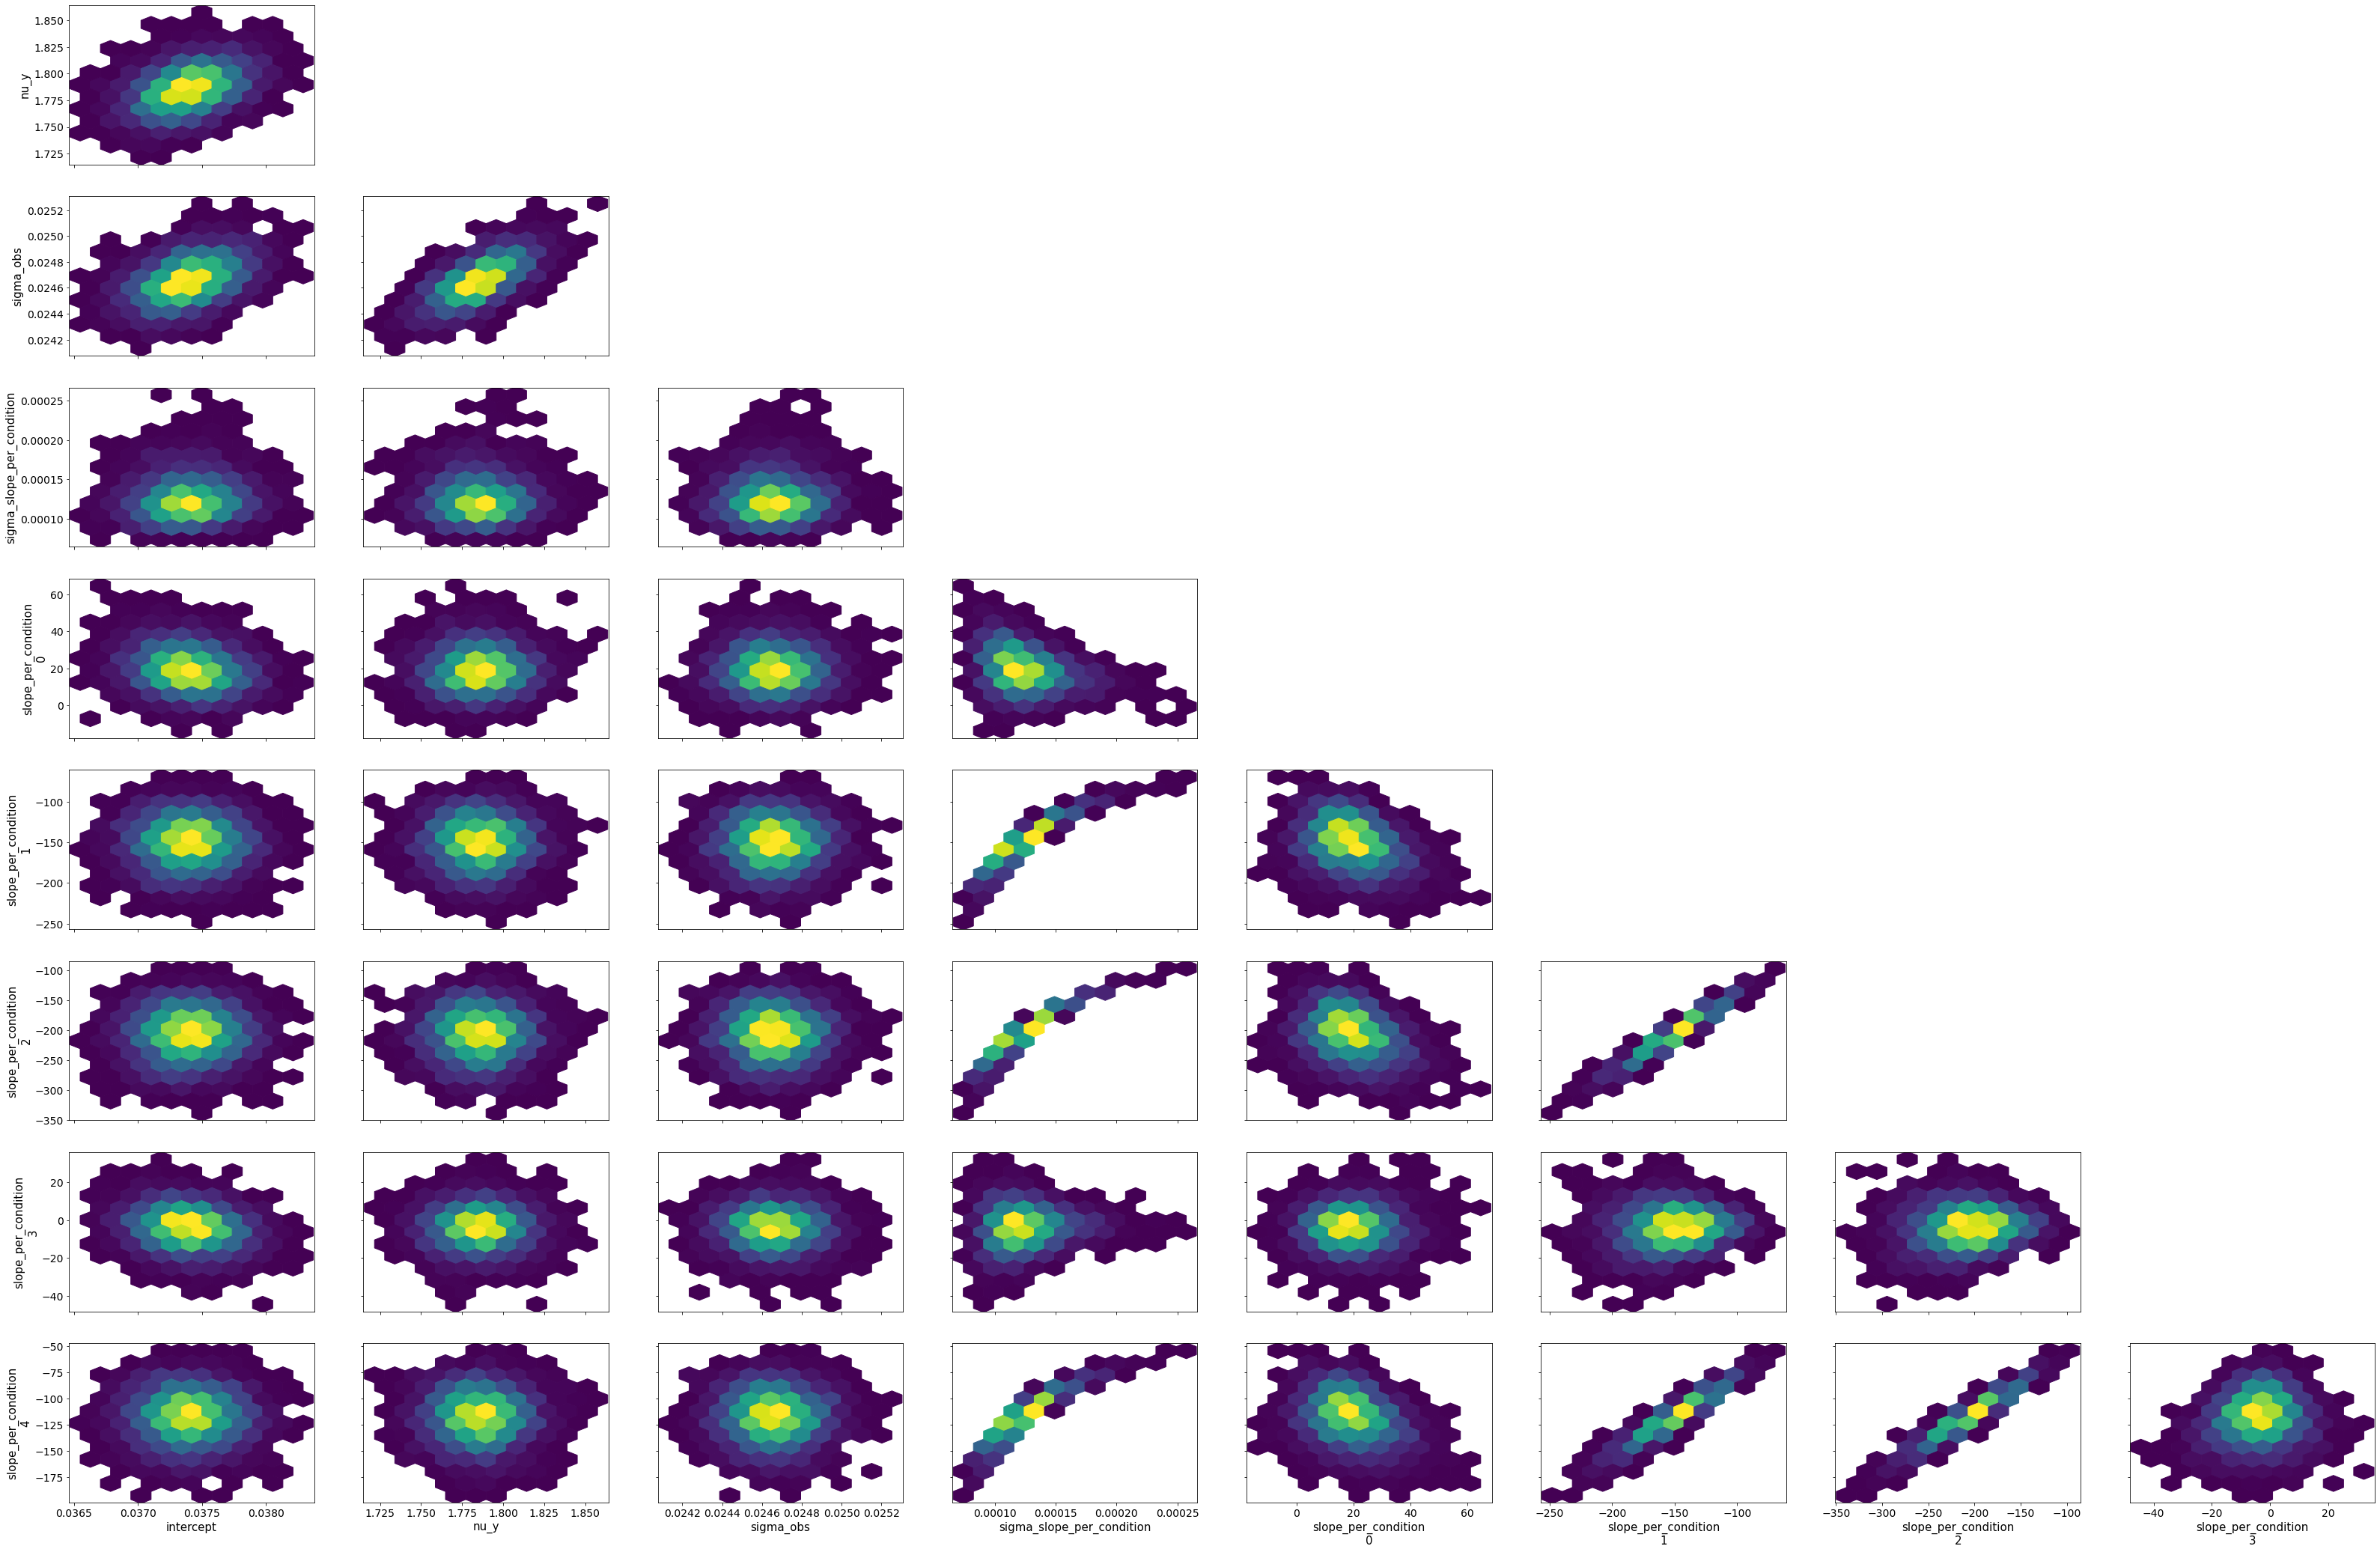

In [24]:
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=(models.model_hierarchical),
              progress_bar=True,
              do_make_change='subtract',
              dist_y='student',
              robust_slopes=False,
              add_group_intercept=False,
              add_group_slope=False, 
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse'))

bw.plot_model_quality()

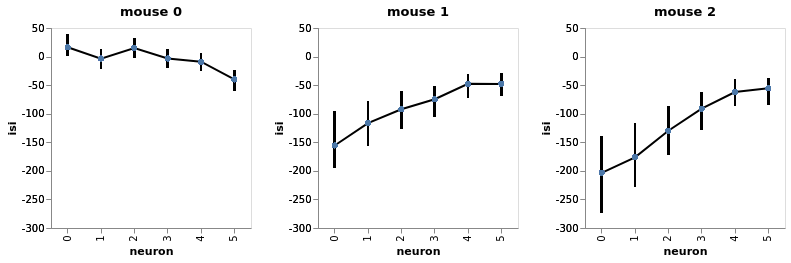

In [25]:

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

sample: 100%|██████████| 1500/1500 [30:19<00:00,  1.21s/it, 1023 steps of size 1.15e-02. acc. prob=0.95]


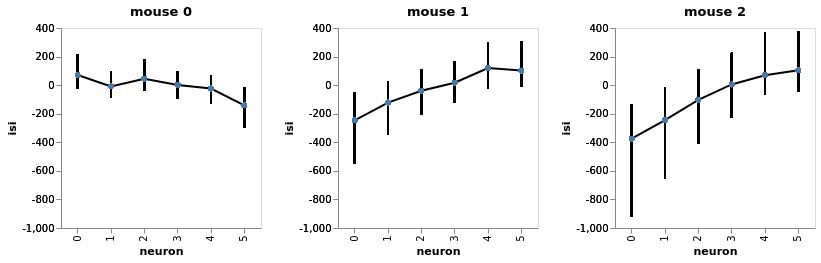

In [26]:

bw = BayesWindow(df_monster, y='isi', treatment='stim', condition='neuron_x_mouse', group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              progress_bar=True,
              dist_y='student',
              use_gpu=True,
              num_chains=1,
              num_warmup=500,
              add_group_slope=True, add_group_intercept=False,
              fold_change_index_cols=('stim', 'mouse', 'neuron','neuron_x_mouse'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)
bw.facet(column='mouse',width=200,height=200).display()

#bw.explore_models(use_gpu=True)

## NUTS Lognormal 

sample: 100%|██████████| 3000/3000 [24:49<00:00,  2.01it/s, 255 steps of size 2.05e-02. acc. prob=0.88]  


n(Divergences) = 61


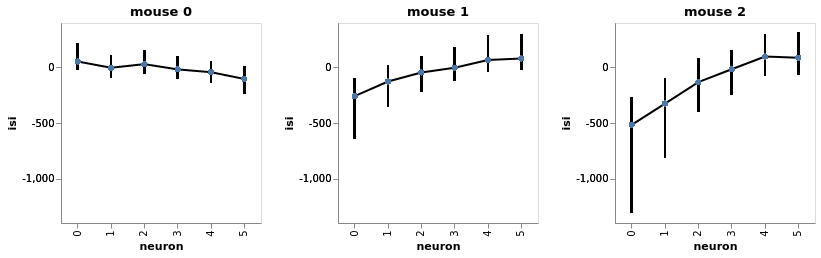

In [27]:
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              progress_bar=True,
              use_gpu=True, num_chains=1, n_draws=1500, num_warmup=1500,
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

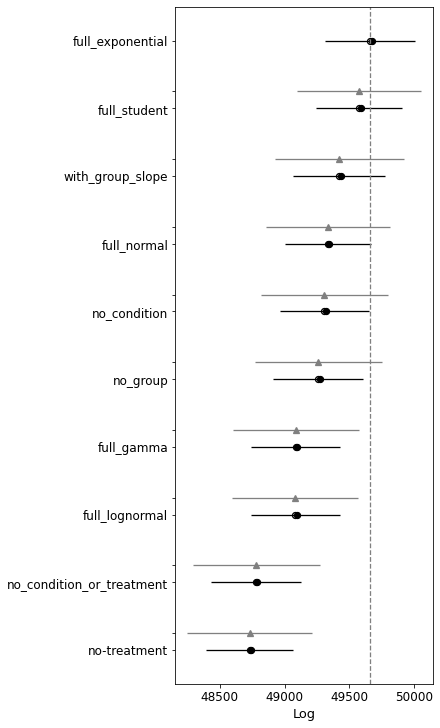

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
full_exponential,0,49660.118546,11.123897,0.000000,1.896504e-01,345.257792,0.000000,False,log
full_student,1,49575.226153,10.582729,84.892393,1.622920e-01,332.939277,479.013638,False,log
with_group_slope,2,49420.509757,11.424781,239.608789,1.620319e-01,356.939675,497.400615,False,log
full_normal,3,49334.178206,10.079833,325.940340,1.222825e-01,329.351647,476.470590,False,log
no_condition,4,49305.844313,9.879511,354.274233,1.140549e-01,345.805986,488.590609,False,log
no_group,5,49259.045237,10.238619,401.073309,1.156132e-01,349.211274,491.479457,False,log
full_gamma,6,49084.997770,11.403203,575.120776,6.706513e-02,345.163452,488.075699,False,log
full_lognormal,7,49080.679863,10.579633,579.438683,6.700998e-02,343.915398,486.827814,False,log
no_condition_or_treatment,8,48778.656340,8.430143,881.462206,7.749200e-09,347.916807,490.178681,False,log
no-treatment,9,48728.474245,7.880707,931.644301,0.000000e+00,337.324641,483.000358,False,log


In [28]:
bw.explore_models(add_group_slope=True)

## BarkerMH

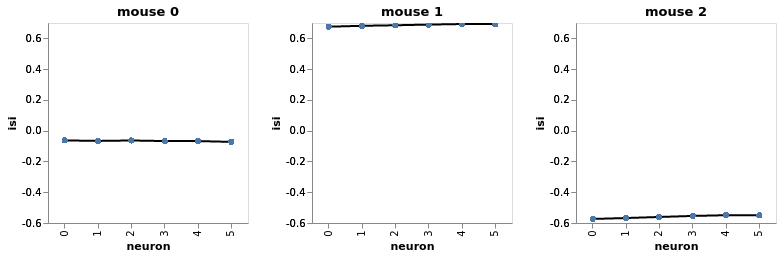

CPU times: user 41.7 s, sys: 2.61 s, total: 44.3 s
Wall time: 1min 8s


In [29]:
%%time
from bayes_window import fitting

from importlib import reload
reload(fitting)

bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              sampler=numpyro.infer.BarkerMH,
#               progress_bar=True,
              use_gpu=False, num_chains=1, n_draws=5000, num_warmup=3000,
              dist_y='student',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_numpyro,
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

## Fit using SVI

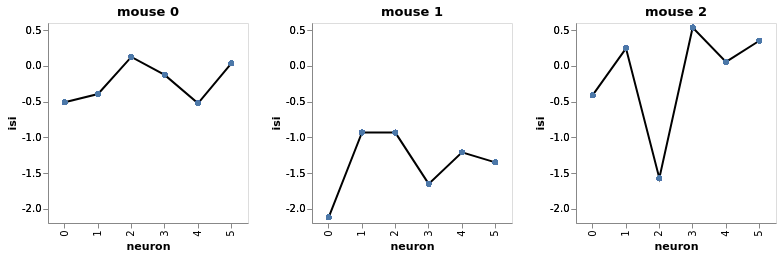

CPU times: user 1min 51s, sys: 4.54 s, total: 1min 56s
Wall time: 1min 18s


In [30]:
%%time
from bayes_window import fitting
from importlib import reload
reload(fitting)
reload(models)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              n_draws=5000,
              dist_y='gamma',
              add_group_slope=True, add_group_intercept=False,
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

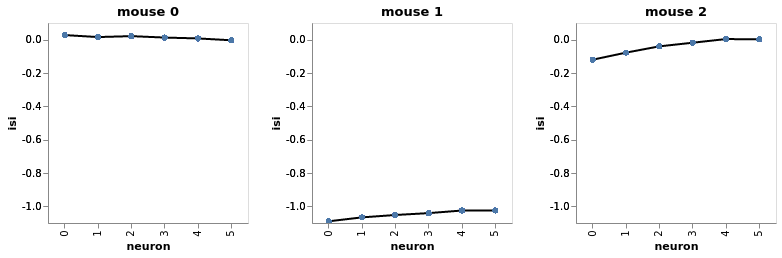

CPU times: user 2min 6s, sys: 37.5 s, total: 2min 44s
Wall time: 3min 6s


In [31]:
%%time
from bayes_window import fitting
import numpyro
from importlib import reload
reload(fitting)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              
            autoguide=numpyro.infer.autoguide.AutoLaplaceApproximation, 
            optim=numpyro.optim.Adam(step_size=0.0005),
            loss=numpyro.infer.Trace_ELBO(), 
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=True, 
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,

              n_draws=int(1e5),
              num_warmup=int(1e5),
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

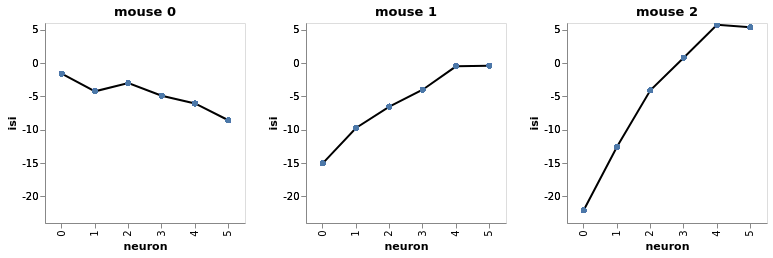

CPU times: user 1min 27s, sys: 6.67 s, total: 1min 34s
Wall time: 1min 52s


In [32]:
%%time 
from bayes_window import fitting
import numpyro
from importlib import reload
reload(fitting)
#numpyro.enable_validation(False)
bw = BayesWindow(df_monster, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.model_hierarchical, do_make_change='subtract',
              #use_gpu=True,
            autoguide=numpyro.infer.autoguide.AutoLaplaceApproximation, 
            optim=numpyro.optim.Adam(1),
            loss=numpyro.infer.Trace_ELBO(), 
              dist_y='lognormal',
              add_group_slope=True, add_group_intercept=False, 
              fold_change_index_cols=('stim', 'mouse', 'neuron'),
              fit_method=fitting.fit_svi,
              #progress_bar=False,
              n_draws=int(1e5),
              num_warmup=int(1e5),
             )

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

Pretty model

In [33]:
reload(models)
bw = BayesWindow(df, y='isi', treatment='stim', condition=['neuron', 'mouse'], group='mouse')
bw.fit_slopes(model=models.reparam_model(models.model_hierarchical_for_render), do_make_change='subtract',
              progress_bar=True,
              use_gpu=False, num_chains=1, n_draws=1500, num_warmup=1500,
              dist_y='normal',
              add_group_slope=True, add_group_intercept=True,
              fold_change_index_cols=('stim', 'mouse', 'neuron'))

bw.plot(x='neuron', color='mouse', independent_axes=True, finalize=True)


bw.facet(column='mouse',width=200,height=200).display()

sample: 100%|██████████| 3000/3000 [00:41<00:00, 72.82it/s, 1023 steps of size 1.19e-03. acc. prob=0.89] 


n(Divergences) = 1


NameError: Unhandled dimension Index(['a_group_dim_0', 'b_group_dim_0'], dtype='object')

In [ ]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hierarchical_for_render, model_args=(1, 1, 1, 1, 
                                                    'gamma', True,
                                                    True),
             render_distributions=True)

In [ ]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hierarchical_for_render, model_args=(1, 1, 1, 1, 
                                                    'gamma', True,
                                                    False),
             render_distributions=True)

In [ ]:
#!pip install git+https://github.com/pyro-ppl/numpyro.git
from numpyro.contrib.render import render_model
reload(models)
render_model(models.model_hier_stim_one_codition, model_args=(1, 1, 1,  
                                                    'gamma', 
                                                    ),
             render_distributions=True)